# Imports

In [1]:
import pandas as pd
import json
import os
import numpy as np
#from load_balance.post_process import plot_box_latency, plot_box_ex_time,plot_box_queu_wait_time,plot_box_queu_wait_time_int,plot_box_latency_int,get_time_outs,extract_qs
from load_balance.post_process import *
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True, style='white')
import matplotlib.pyplot as plt
import ast


In [2]:
#Common calculations
oracle = 2876
plan= 2479
print(f"PlanRGCN Oracle throughput deviation: {(oracle-plan)/oracle}")
oracle = 5578
plan= 5749
print(f"PlanRGCN Oracle throughput deviation: {(oracle-plan)/oracle}")

PlanRGCN Oracle throughput deviation: 0.13803894297635605
PlanRGCN Oracle throughput deviation: -0.030656149157404087


# Wikidata

In [3]:

base = '/data/wikidata_0_1_10_v3_path_weight_loss'
pathFIFOMU22 = f'{base}/load_balance_FIFO_22_10_worker'
pathFIFOMU44 = f'{base}/load_balance_FIFO_44_10_workers'


pathPlan22 = f'{base}/load_balance_PlanRGCN_22_12workser'
pathPlan44 = f'{base}/load_balance_PlanRGCN_44'

pathOracle22 = f'{base}/load_balance_Oracle_22_10workers'
pathOracle44 = f'{base}/load_balance_Oracle_44_10workers'

In [4]:
path_data = {
    'FIFO (μ=22)': pathFIFOMU22, 
    'PlanRGCN (μ=22)': pathPlan22, 
    'Oracle (μ=22)': pathOracle22, 
    
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
}
path_data = {
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
}
from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO (μ=44) & 4149 & 15 \\
PlanRGCN (μ=44) & 5749 & 7 \\
Oracle (μ=44) & 5578 & 5 \\
\bottomrule
\end{tabular}



In [40]:

fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
fifo44, fifo_timed44 = extract_qs(pathFIFOMU44)

mu22, mu22_timed = extract_qs(pathPlan22)
mu44, mu44_timed = extract_qs(pathPlan44)

or22, or22_timed = extract_qs(pathOracle22)
or44, or44_timed = extract_qs(pathOracle44)

data = {
    'FIFO (μ=22)': fifo22, 
    'PlanRGCN (μ=22)': mu22, 
    'Oracle (μ=22)': or22, 
    
    'FIFO (μ=44)': fifo44, 
    'PlanRGCN (μ=44)': mu44, 
    'Oracle (μ=44)': or44, 
}
wikidata = {
    'FIFO': fifo44, 
    'PlanRGCN': mu44, 
    'Oracle': or44, 
}

In [6]:

get_time_outs(wikidata)

Time outs
FIFO (μ=44) Timeouts : 15
PlanRGCN (μ=44) Timeouts : 7
Oracle (μ=44) Timeouts : 5


{'FIFO (μ=44)': 15, 'PlanRGCN (μ=44)': 7, 'Oracle (μ=44)': 5}

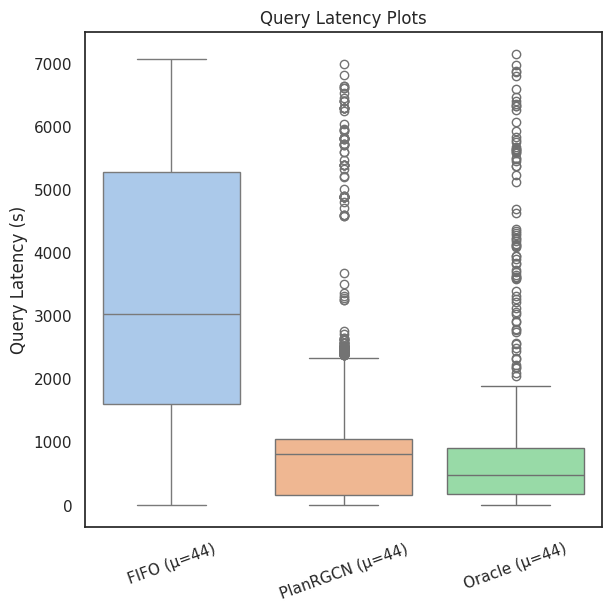

In [7]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(wikidata)

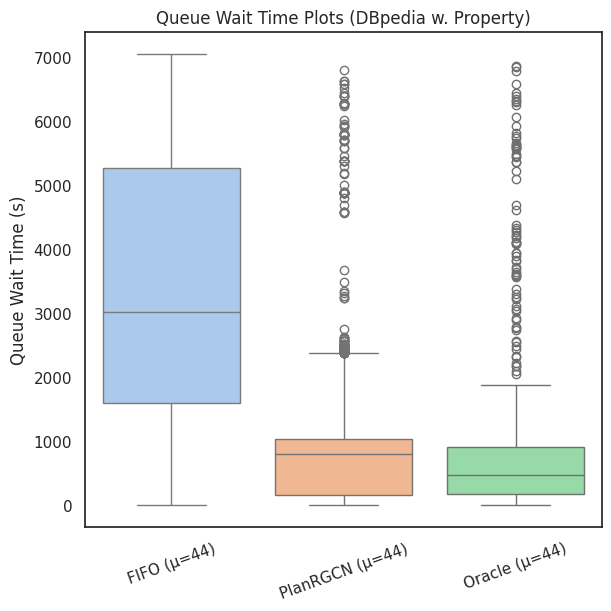

In [8]:

def plot_box_queu_wait_time(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia w. Property)")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
plot_box_queu_wait_time(wikidata)

FIFO (μ=44)__________
25%  0.9999575541967392
mean  0.9867924778182849
75%  0.999998720379063
PlanRGCN (μ=44)__________
25%  0.9997712099531681
mean  0.9902559692001105
75%  0.9999944658794719
Oracle (μ=44)__________
25%  0.9994400373547232
mean  0.9394750527804454
75%  0.9999941343798486


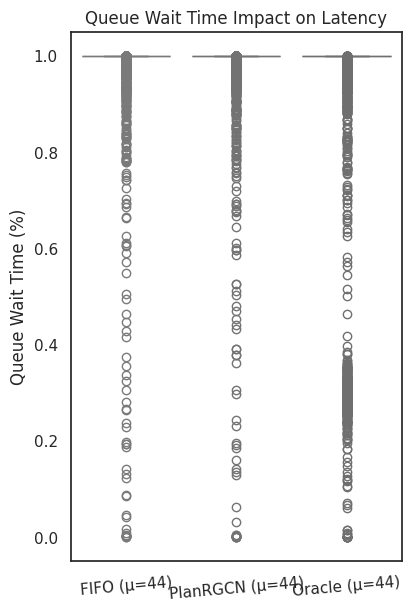

In [9]:
def plot_box_queu_wait_time_percentage(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        k_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in dct[k]]
        print(f'{k}__________')
        print("25% ",np.quantile(k_queu_wait_time,q=0.25))
        print("mean ", np.mean(k_queu_wait_time))
        print("75% ", np.quantile(k_queu_wait_time,q=0.75))
        ax = sns.boxplot(y=k_queu_wait_time,x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(wikidata)

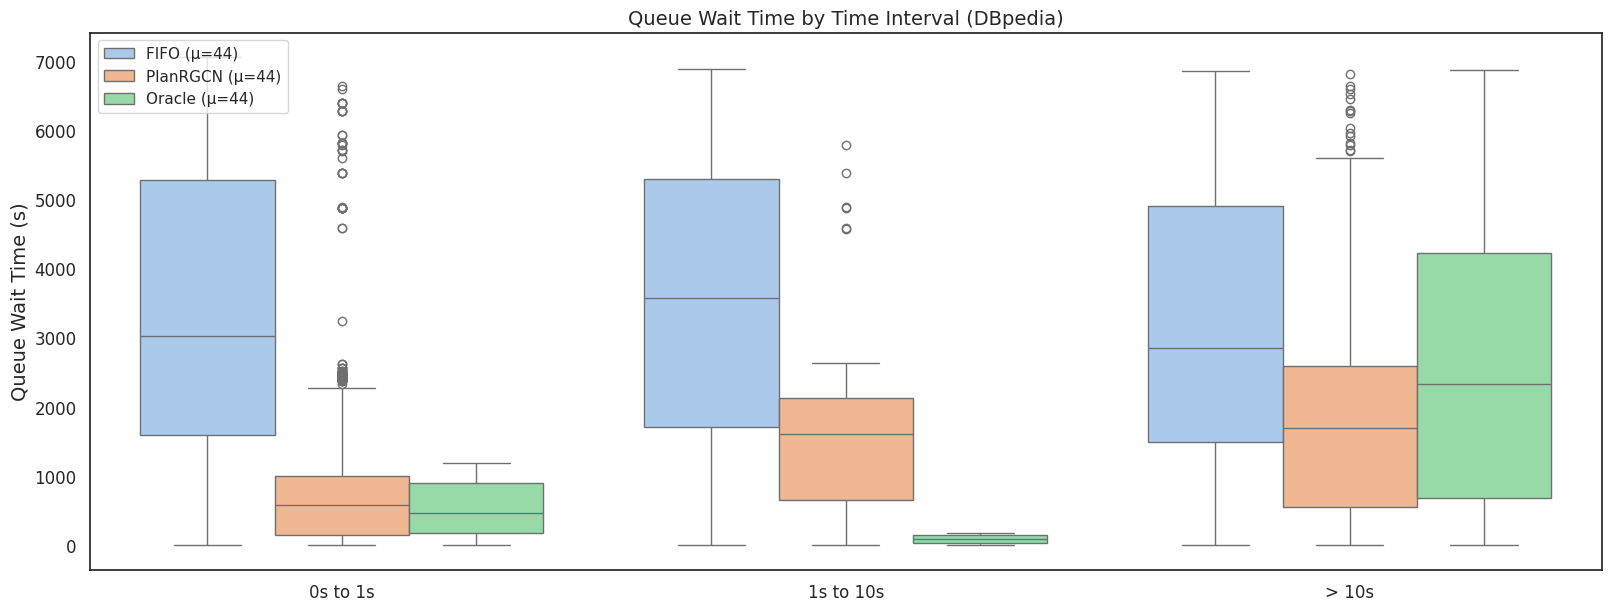

In [10]:

plot_box_queu_wait_time_int(wikidata, title='Queue Wait Time by Time Interval (DBpedia)',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(16,6))

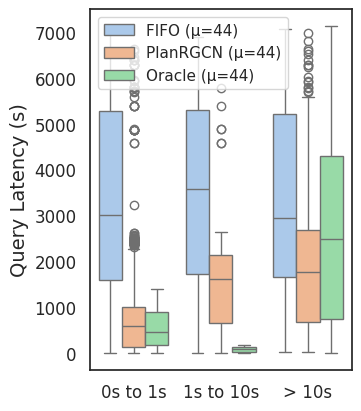

In [11]:

plot_box_latency_int(wikidata, title='',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(3.5,4))

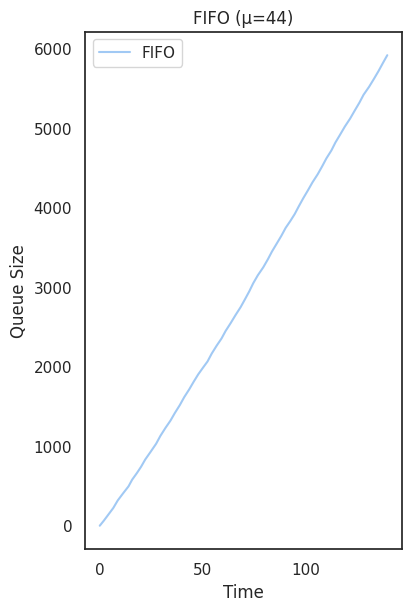

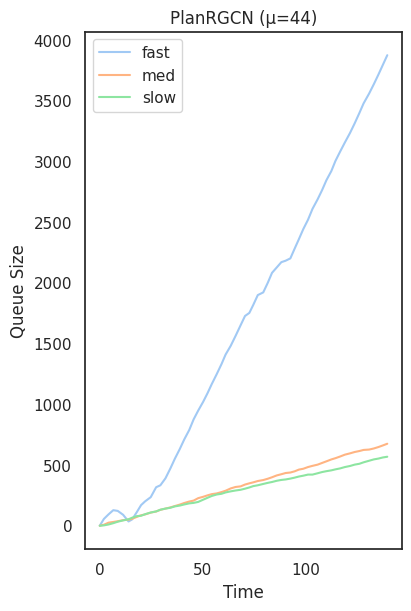

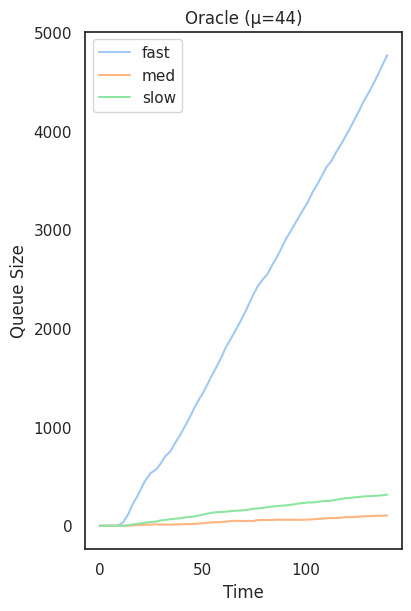

In [12]:

def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
    
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    try:
        for k in ['fast', 'med', 'slow']:
            ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    except:
        ax = sns.lineplot(y=[q['fifo'] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label='FIFO')
        
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)

for k in path_data.keys():
    plot_queu_size(path_data[k], title = k)

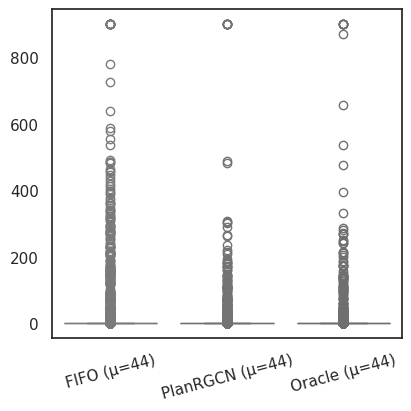

In [13]:
plot_box_ex_time(wikidata)

In [45]:
#model inference time average:
model_inf = pd.read_csv(f"{base}/test_model_inference_times.csv")
model_inf.describe()

,time
count,6250.000000
mean,0.015518
std,0.012690
min,0.006536
25%,0.008829
50%,0.011221
75%,0.015930
max,0.198866


# DBpedia

In [14]:
from load_balance.post_process import extract_qs

In [46]:
base = "/data/DBpedia2016_0_1_10_path_v3_weight_loss"
pathFIFOMU22 = f'{base}/load_balance_FIFO_22_10_workers'
pathFIFOMU44 = f'{base}/load_balance_FIFO_44_10_workers'


pathPlan22 = f'{base}/load_balance_PlanRGCN_22_10_workers'
pathPlan44 = f'{base}/load_balance_PlanRGCN_44_10_workers'

pathOracle22 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_Oracle_22_10_workers'
pathOracle44 = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/load_balance_Oracle_44_10_workers'

In [47]:
path_data = {
    'FIFO (μ=22)': pathFIFOMU22, 
    'PlanRGCN (μ=22)': pathPlan22, 
    'Oracle (μ=22)': pathOracle22, 
    
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
}
path_data = {
    'FIFO (μ=44)': pathFIFOMU44, 
    'PlanRGCN (μ=44)': pathPlan44, 
    'Oracle (μ=44)': pathOracle44, 
}
from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

\begin{tabular}{lrr}
\toprule
 & Good Queries & Time out \\
\midrule
FIFO (μ=44) & 726 & 58 \\
PlanRGCN (μ=44) & 2479 & 48 \\
Oracle (μ=44) & 2876 & 15 \\
\bottomrule
\end{tabular}



In [48]:

fifo22, fifo_timed22 = extract_qs(pathFIFOMU22)
fifo44, fifo_timed44 = extract_qs(pathFIFOMU44)

mu22, mu22_timed = extract_qs(pathPlan22)
mu44, mu44_timed = extract_qs(pathPlan44)

or22, or22_timed = extract_qs(pathOracle22)
or44, or44_timed = extract_qs(pathOracle44)

data = {
    'FIFO (μ=22)': fifo22, 
    'PlanRGCN (μ=22)': mu22, 
    'Oracle (μ=22)': or22, 
    
    'FIFO (μ=44)': fifo44, 
    'PlanRGCN (μ=44)': mu44, 
    'Oracle (μ=44)': or44, 
}
dbpedia = {
    'FIFO': fifo44, 
    'PlanRGCN': mu44, 
    'Oracle': or44, 
}

In [18]:
from load_balance.post_process import get_time_outs
get_time_outs(dbpedia)

Time outs
FIFO (μ=44) Timeouts : 58
PlanRGCN (μ=44) Timeouts : 48
Oracle (μ=44) Timeouts : 15


{'FIFO (μ=44)': 58, 'PlanRGCN (μ=44)': 48, 'Oracle (μ=44)': 15}

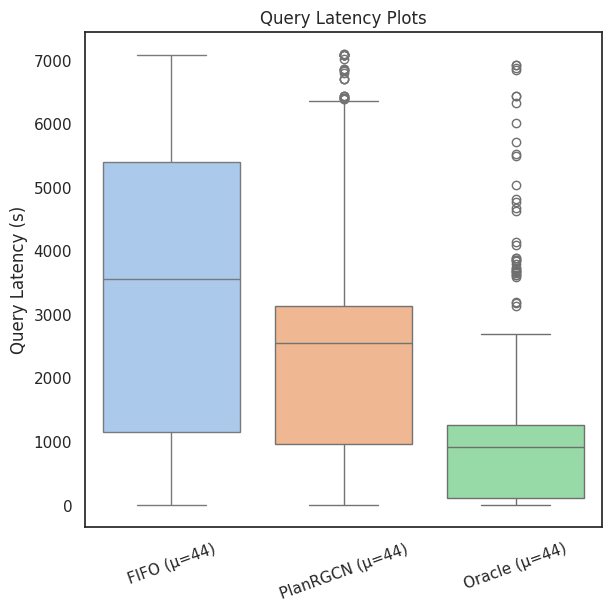

In [19]:

def plot_box_latency(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['latency'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    #ax = sns.boxplot(y=[q['latency'] for q in qpp_lb],x=['PlanRGCN Load Balancer' for q in qpp_lb], ax=ax)
    ax.set_ylabel('Query Latency (s)')
    ax.set_title("Query Latency Plots")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
    
plot_box_latency(dbpedia)

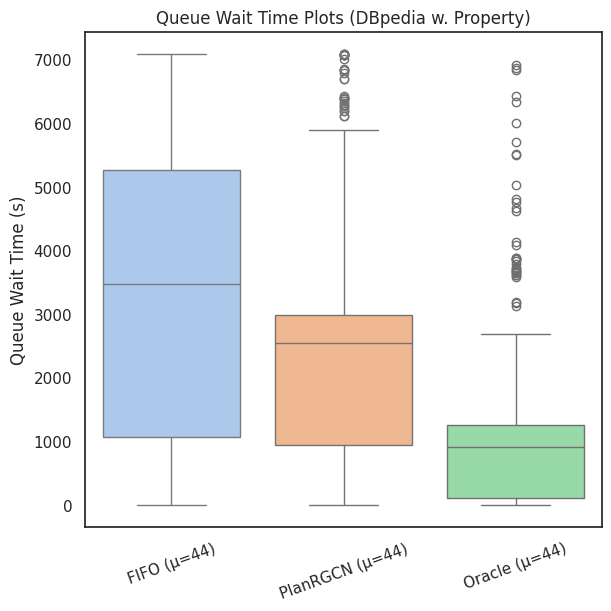

In [20]:
from load_balance.post_process import plot_box_queu_wait_time
def plot_box_queu_wait_time(dct, figsize=(6,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        ax = sns.boxplot(y=[q['queue_wait_time'] for q in dct[k]],x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (s)')
    ax.set_title("Queue Wait Time Plots (DBpedia w. Property)")
    ax.tick_params(axis='x', rotation=20)
    plt.show()
plot_box_queu_wait_time(dbpedia)

FIFO (μ=44)__________
25%  0.9929351554113438
mean  0.9482719279146206
75%  0.9999866529316022
PlanRGCN (μ=44)__________
25%  0.9997274007573567
mean  0.983086082474651
75%  0.9999857867554376
Oracle (μ=44)__________
25%  0.9985351228819863
mean  0.9853019546715804
75%  0.9999374832705972


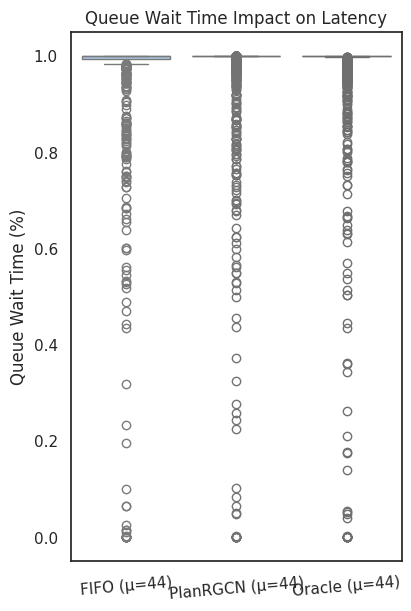

In [21]:
def plot_box_queu_wait_time_percentage(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        k_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in dct[k]]
        print(f'{k}__________')
        print("25% ",np.quantile(k_queu_wait_time,q=0.25))
        print("mean ", np.mean(k_queu_wait_time))
        print("75% ", np.quantile(k_queu_wait_time,q=0.75))
        ax = sns.boxplot(y=k_queu_wait_time,x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(dbpedia)

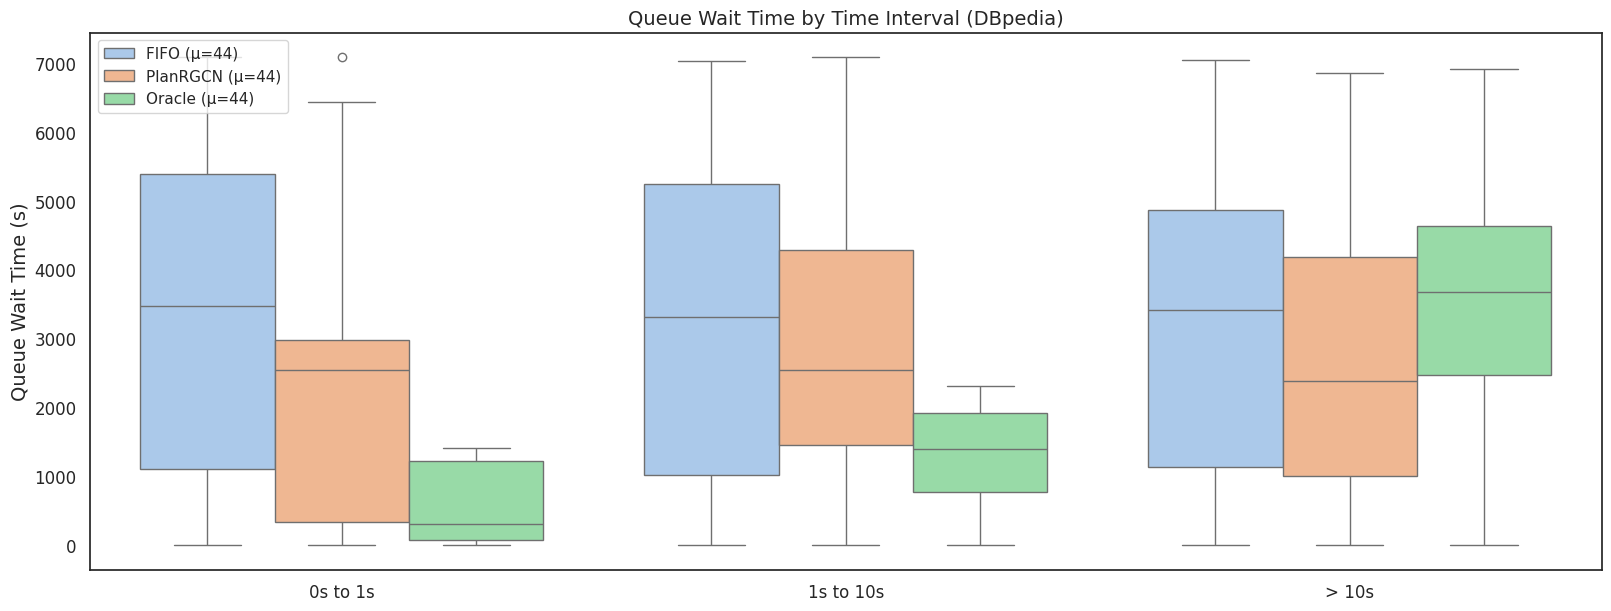

In [22]:

    
plot_box_queu_wait_time_int(dbpedia, title='Queue Wait Time by Time Interval (DBpedia)',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(16,6))

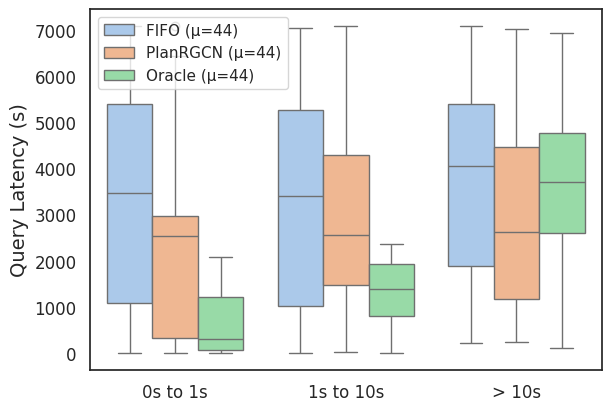

In [23]:

plot_box_latency_int(dbpedia, title='',time_intervals=['0s to 1s', '1s to 10s', '> 10s'], figsize=(6,4))

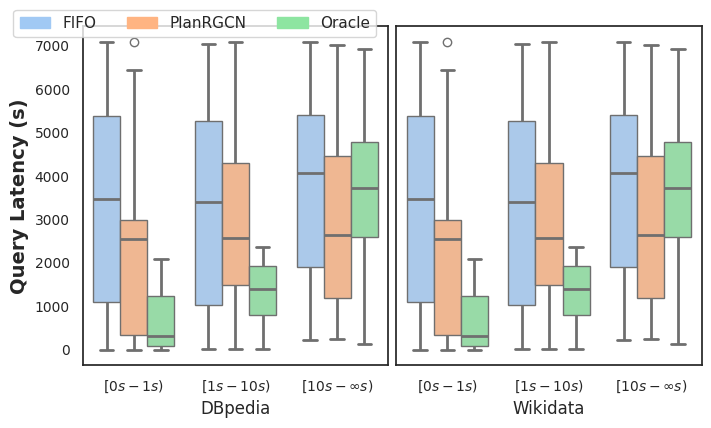

In [41]:
#from load_balance.post_process import plot_box_lat_int_comb
import load_balance.post_process as pp
import importlib
importlib.reload(pp)
plot_box_lat_int_comb = pp.plot_box_lat_int_comb
legend_dict= {
    'bbox_to_anchor':(0, 1.05),
    'ncol':3,
    }
int_to_col = { 'FIFO':'#a1c9f4','PlanRGCN':'#ffb482',  'Oracle':'#8de5a1'}
save_path = "/PlanRGCN/query_lat_comb.png"
plot_box_lat_int_comb((dbpedia,'DBpedia'), 
                      (wikidata,'Wikidata'), 
                      figsize=(7,4), 
                      title='', 
                      time_intervals=['$[0s - 1s)$', '$[1s - 10s)$', '$[10s - \infty s)$'],
                      legend_dict=legend_dict, int_to_col=int_to_col,
                      save_path = save_path,
                      x_label_size=10,
                      x_rotation = 0,
                      y_label_size=10,
                      )

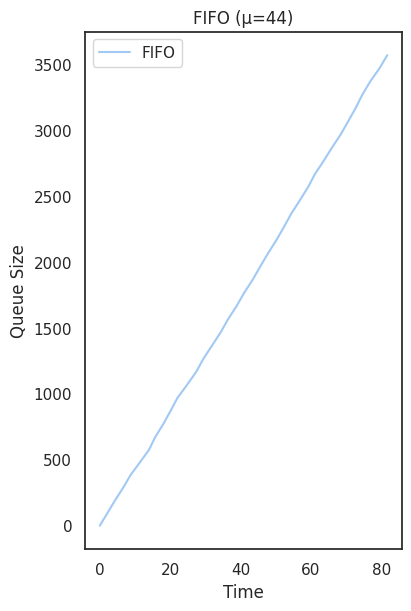

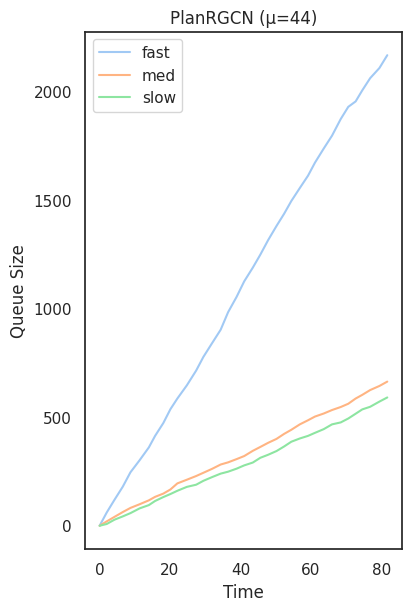

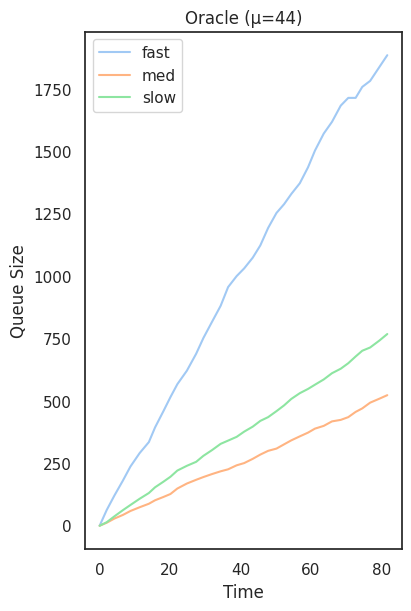

In [25]:
def get_queu_size(path):
    data = []
    for line in open(f'{path}/main_file.log').readlines():
        if '{' in line:
            data.append( ast.literal_eval('{'+line.split('{')[1]))
    return data
    
def plot_queu_size_helper(q_data, figsize=(4,6), title=None):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    try:
        for k in ['fast', 'med', 'slow']:
            ax = sns.lineplot(y=[q[k] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label=k)
    except:
        ax = sns.lineplot(y=[q['fifo'] for q in q_data], x=[q['time'] for q in q_data] , ax=ax, label='FIFO')
        
    ax.set_ylabel('Queue Size')
    ax.set_xlabel('Time')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_queu_size(path, figsize=(4,6), title=None):
    q_data = get_queu_size(path)
    plot_queu_size_helper(q_data, figsize=figsize, title=title)

for k in path_data.keys():
    plot_queu_size(path_data[k], title = k)

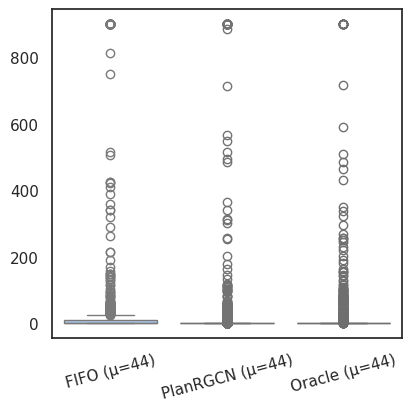

In [26]:
plot_box_ex_time(dbpedia)

In [49]:
#model inference time average:
model_inf = pd.read_csv(f"{base}/test_model_inference_times.csv")
model_inf.describe()

,time
count,3620.000000
mean,0.013557
std,0.012853
min,0.006097
25%,0.008305
50%,0.009755
75%,0.016155
max,0.267888


## FIFO load balancer

In [27]:
import pandas as pd
import json
import os
import numpy as np

In [28]:
from load_balance.post_process import extract_qs

In [29]:
pathFIFO = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO'
pathPlan = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance'
pathOracle = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_oracle'
pathMU22 = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balanceMUNew2'
pathMU10 = '/data/wikidata_0_1_10_v3_path_weight_loss/load_balanceMU10'

In [30]:
path_data = {
    'FIFO Load Balancer': pathFIFO, 
    'PlanRGCN Load Balancer': pathPlan, 
    'Oracle Load Balancer': pathOracle, 
    'PlanRGCN (MU=22)': pathMU22,
    'PlanRGCN (MU=10)': pathMU10
}

from load_balance.post_process import get_overview_table
print(get_overview_table(path_data).to_latex())

FileNotFoundError: [Errno 2] No such file or directory: '/data/wikidata_0_1_10_v3_path_weight_loss/load_balance_FIFO'

In [ ]:
"""
{'query': '{"ID": "http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE", "text": "PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 \\"180659\\" } ", "true_interval": "0"}',
 'start_time': 1705466079.4959524,
 'arrival_time': 1705466079.5066175,
 'queue_arrival_time': 1705466079.5613253,
 'query_execution_start': 1705466079.5627425,
 'query_execution_end': 1705466079.713499,
 'execution_time': 0.1507565975189209,
 'response': 'ok',
 'ID': 'http://lsq.aksw.org/lsqQuery-JAG3AHd7PqKLCEiTgFKwJFO568s0p4jxGGaU8dz_lFE',
 'text': 'PREFIX xsd: <http://www.w3.org/2001/XMLSchema#> PREFIX wdt: <http://www.wikidata.org/prop/direct/> SELECT ?var1 WHERE { ?var1 wdt:P2346 "180659" } ',
 'true_interval': '0',
 'ex_time': 0.1507565975189209,
 'latency': 0.20688152313232422,
 'queue_wait_time': 0.0014171600341796875}
"""

fifo, fifo_timed = extract_qs(pathFIFO)
qppBalance, plan_timed = extract_qs(pathPlan)
oracle, oracle_timed = extract_qs(pathOracle)
mu22, mu22_timed = extract_qs(pathMU22)
mu10, mu10_timed = extract_qs(pathMU10)
data = {'FIFO Load Balancer': fifo, 'PlanRGCN Load Balancer': qppBalance, 'Oracle Load Balancer': oracle, 'PlanRGCN (MU=22)': mu22,'PlanRGCN (MU=10)': mu10}
len(fifo), len(qppBalance), len(oracle), len(mu22), len(mu10)

In [ ]:
len(fifo_timed),len(plan_timed), len(oracle_timed), len(mu22_timed), len(mu10_timed)

In [ ]:
fifo[0]

In [ ]:
from load_balance.post_process import get_time_outs
get_time_outs(data)

In [ ]:
from load_balance.post_process import get_good_qs
get_good_qs(data)
#print(f"QPP LB Good Queries : {np.sum([1 for x in qppBalance if x['response'] == 'ok'])}")

In [ ]:
from load_balance.post_process import get_good_qs
print("Not Good Queries")
for k in data.keys():
    print(f"{k} not Good Queries : {[x for x in data[k] if x['response'] != 'ok']}")

In [ ]:
import seaborn as sns
sns.set_theme(palette='pastel',color_codes = True)

from load_balance.post_process import plot_box_latency, plot_box_ex_time
plot_box_latency(data)

In [ ]:
plot_box_ex_time(data)

In [ ]:
from load_balance.post_process import plot_box_queu_wait_time
plot_box_queu_wait_time(data)

In [ ]:
for k in data.keys():
    print(f"Average Queue Wait Time '{k}' {np.mean([x['queue_wait_time'] for x in data[k]])}")

In [ ]:
import matplotlib.pyplot as plt

def plot_box_queu_wait_time_percentage(dct, figsize=(4,6)):
    fig, ax = plt.subplots(layout='constrained', figsize=figsize)
    for k in dct.keys():
        k_queu_wait_time = [q['queue_wait_time']/q['latency'] for q in dct[k]]
        print(f'{k}__________')
        print("25% ",np.quantile(k_queu_wait_time,q=0.25))
        print("mean ", np.mean(k_queu_wait_time))
        print("75% ", np.quantile(k_queu_wait_time,q=0.75))
        ax = sns.boxplot(y=k_queu_wait_time,x=[k for q in dct[k]], ax=ax)
    ax.set_ylabel('Queue Wait Time (%)')
    ax.set_title("Queue Wait Time Impact on Latency")
    ax.tick_params(axis='x', rotation=5)
    plt.show()
plot_box_queu_wait_time_percentage(data)

In [ ]:
from load_balance.post_process import calculate_avg_latency
calculate_avg_latency(data)

In [ ]:
#lat_total_fifo/len(fifo), lat_total_qpp/len(qppBalance)

In [ ]:
#avg_fifo =lat_total_fifo/len(fifo)
#avg_qpp = lat_total_qpp/len(qppBalance)
#relative_impro = ((lat_total_qpp-lat_total_fifo)/lat_total_fifo)*100
#relative_impro

In [ ]:
#((lat_total_fifo-lat_total_qpp)/lat_total_qpp)*100